In [1]:
from bs4 import BeautifulSoup
import urllib.request  # library to handle requests
import pandas as pd
import json  # library to handle JSON files
from pandas.io.json import json_normalize  # transform json files to pandas dataframes
from geopy.geocoders import Nominatim  # convert an address into latitude and longitude values
import requests
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import numpy as np
import csv

print('All modules imported')

All modules imported


In [2]:
#link from wikipedia
kano_link = 'https://en.wikipedia.org/wiki/Kano_State#:~:text=Population,populated%20by%20the%20Hausa%20people.'

In [3]:
source=urllib.request.urlopen(kano_link)

In [4]:
soup = BeautifulSoup(source,'lxml')

In [5]:
#this gets the tables on the datapage
all_tables = soup.find_all('table')
all_tables

[<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation"><tbody><tr><td class="mbox-image"><div style="width:52px"><a class="image" href="/wiki/File:Question_book-new.svg"><img alt="" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>needs additional citations for <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a></b>.<span class="hide-when-compact"> Please help <a class="external text" href="https://en.wikipedia.org/w/index.php?title=Kano_State&amp;acti

In [6]:
correct_table=soup.find('table', class_='sortable wikitable')
correct_table

<table class="sortable wikitable">
<tbody><tr>
<th>LGA Name
</th>
<th>Area (km<sup>2</sup>)
</th>
<th>Census 2006<br/> population
</th>
<th>Administrative capital
</th>
<th>Postal<br/>Code
</th>
<th>Local Government chairman and the Head of the Local Government Council
</th></tr>
<tr>
<td><a href="/wiki/Fagge" title="Fagge">Fagge</a>
</td>
<td>21
</td>
<td>200,095
</td>
<td>Waje
</td>
<td>700
</td>
<td>Alh. Habibu Saleh Mai Lemo <a href="/wiki/All_Progressives_Congress" title="All Progressives Congress">(APC)</a>
</td></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/Dala,_Nigeria" title="Dala, Nigeria">Dala</a>
</td>
<td>19
</td>
<td>418,759
</td>
<td>Gwanmaja
</td>
<td>700
</td>
<td>Alh. Ibrahim Suleiman Dan’isle <a href="/wiki/All_Progressives_Congress" title="All Progressives Congress">(APC)</a>
</td></tr>
<tr>
<td><a href="/wiki/Gwale" title="Gwale">Gwale</a>
</td>
<td>18
</td>
<td>357,827
</td>
<td><a href="/wiki/Gwale" title="Gwale">Gwale</a>
</td>
<td>700
</td>
<td>Alh. Abdulla

In [7]:
#this is for scraping the data into a list
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]

for row in correct_table.find_all('tr'):
    cell=row.find_all('td')
    if len(cell)==6:
        A.append(cell[0].find(text=True))
        B.append(cell[1].find(text=True))
        C.append(cell[2].find(text=True))
        D.append(cell[2].find(text=True))
        E.append(cell[2].find(text=True))
        F.append(cell[2].find(text=True))     

In [8]:
#the numbers have a comma in it, so we want to remove it
ab=[]
for item in C:
    item = item.replace(',','')
    ab.append(item)

In [9]:
#this involves cleaning the data further to remove '\n'
df=pd.DataFrame(A,columns=['LGA'])

df['POP']=ab

df['POP']=df['POP'].str.split('\n')
df['POP']=df['POP'].str.get(0)

In [10]:
df['POP']=df['POP'].astype(int)

In [11]:
df.dtypes

LGA    object
POP     int32
dtype: object

In [12]:
df.head()

,LGA,POP
0,Fagge,200095
1,Dala,418759
2,Gwale,357827
3,Kano Municipal,371243
4,Tarauni,221844


In [13]:
#this function takes in an address and returns the longitude and latitude
def latitude_longitude(Borough):
    import time
    """ Method takes a Series object and returns
    a list of Latitude and corresponding Longitude data,
    using the geopy library.
    This method also prints out the coordinate data"""
    
    address = str(Borough)+' Kano'
    
    # We must define a geolocator user agent
    geolocator = Nominatim(user_agent="NG_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinates of {} are lat {} and long {}.'.format(address, latitude, longitude))
    # WARNING: we let 2 secs pass after calling each location lat/lon so that the geocode function may not crash as it crashes quite often
    # Feel free to wait a few seconds and re-run this cell if it crashes or displays an Error message.
    time.sleep(2)  
    return [latitude, longitude]

In [14]:
df['latitude'] =df['LGA'].apply(latitude_longitude)

The geograpical coordinates of Fagge Kano are lat 12.032223 and long 8.517419685338357.
The geograpical coordinates of Dala Kano are lat 12.00909205 and long 8.505168598184804.
The geograpical coordinates of Gwale Kano are lat 11.98522885 and long 8.506324612466788.
The geograpical coordinates of Kano Municipal Kano are lat 11.9918671 and long 8.5303654.
The geograpical coordinates of Tarauni Kano are lat 11.97831265 and long 8.552328051122903.
The geograpical coordinates of Nassarawa Kano are lat 12.102 and long 8.33101.
The geograpical coordinates of Kumbotso Kano are lat 11.888001 and long 8.502173.
The geograpical coordinates of Ungogo Kano are lat 12.0916 and long 8.49534.
The geograpical coordinates of Dawakin Tofa Kano are lat 12.142136 and long 8.36111612636891.
The geograpical coordinates of Tofa Kano are lat 12.0573767 and long 8.2731312.
The geograpical coordinates of Rimin Gado Kano are lat 11.963873 and long 8.250295.
The geograpical coordinates of Bagwai Kano are lat 12.1

In [15]:
#this is used for seperating the rows that are together
alist = []
for a, b in df.iterrows():
    alist.append(b.latitude[1])
    df.iat[a,2] = b.latitude[0]
df['longitude'] = alist

In [16]:
#make a copy of df with lga as index
copy = df.copy(deep=True) 
copy.set_index('LGA', inplace=True)

# Lets view the effect
copy.head()

,POP,latitude,longitude
LGA,,,
Fagge,200095,12.0322,8.517420
Dala,418759,12.0091,8.505169
Gwale,357827,11.9852,8.506325
Kano Municipal,371243,11.9919,8.530365
Tarauni,221844,11.9783,8.552328


In [17]:
#this returns a map of longitude and latititude
def plot_map(value):
    lat = copy.loc[value, 'latitude']
    lon = copy.loc[value, 'longitude']
    
    # create map of lga using latitude and longitude values using folium
    map_lga = folium.Map(location=[lat, lon], zoom_start=14)
    label = "{}".format(value)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.8,
        parse_html=False).add_to(map_lga)  
    return map_lga

In [18]:
def clean_category(value):
    value = value[0]['name']
    return value

# getting data from foursquare

In [85]:
CLIENT_ID = 'SHZGKF5EWPSH2Q1I0T0J5PCHBQCGPK0CVZRQK1ZAFH2ZBRAF' 
CLIENT_SECRET = 'KXPHK4RZ3AENYNT3GOEO11G5Y4EXM1RWNBI202VL0YC443ZT' 
VERSION = '20200504'
radius = 10000 
LIMIT=200
def return_venues(value):
    lat = copy.loc[value, 'latitude']
    lon = copy.loc[value, 'longitude']
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lon, 
        radius, 
        LIMIT)   
    results = requests.get(url).json()
    venues = results['response']['groups'][0]['items']
    venues = json_normalize(venues)
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng',
                        'venue.location.distance', 'venue.id']
    venues = venues[filtered_columns]
    venues['venue.categories'] = venues['venue.categories'].apply(clean_category)
    return venues

In [86]:
# # we want to remove any local governments less than 2 venues
lga_exclusion_list = []

for i in range(len(copy)):
    x = copy.index[i]
    z = x
    x+='_lga_venues'
    try:
        y = return_venues(copy.index[i])
    except:continue
        
    print('Total number of venues returned for {} is {}'.format(x, len(y)))
    if len(y) <= 2:
        lga_exclusion_list.append(z)
    print(y.head())
    print()
print('LGAs to be possibly excluded due to low venues count are:- ')
print(lga_exclusion_list)

C:\Users\ebuka\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Fagge_lga_venues is 33
                             venue.name     venue.categories  \
0                     grand square Mall        Shopping Mall   
1                           Pizza shack          Pizza Place   
2                              Wellcare     Department Store   
3  Mallam Aminu Kano Airport VIP longue       Airport Lounge   
4              Kano fried chicken( Kfc)  Fried Chicken Joint   

   venue.location.lat  venue.location.lng  venue.location.distance  \
0           12.020898            8.535897                     2374   
1           12.007809            8.552716                     4706   
2           12.006727            8.558666                     5312   
3           12.046536            8.521965                     1668   
4           12.006638            8.559862                     5428   

                   venue.id  
0  4fc8d5d3e4b081b29eb3ff04  
1  4d1aeef011fca0931a409ace  
2  4fd4de42e4b0d14240b56194  
3  52b0be3c498e

C:\Users\ebuka\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Dala_lga_venues is 33
          venue.name venue.categories  venue.location.lat  venue.location.lng  \
0  grand square Mall    Shopping Mall           12.020898            8.535897   
1         Gadon Kaya      Art Gallery           11.982200            8.495944   
2        Pizza shack      Pizza Place           12.007809            8.552716   
3   Yahuza Suya Spot        BBQ Joint           11.988505            8.541734   
4    Ado Bayero Mall    Shopping Mall           11.977998            8.535017   

   venue.location.distance                  venue.id  
0                     3594  4fc8d5d3e4b081b29eb3ff04  
1                     3157  4d5269b69d49370494b6d739  
2                     5179  4d1aeef011fca0931a409ace  
3                     4593  4d5430895b3f6dcbce96dccc  
4                     4748  54d48f3b498e017e3b26f03d  



C:\Users\ebuka\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Gwale_lga_venues is 33
          venue.name  venue.categories  venue.location.lat  \
0         Gadon Kaya       Art Gallery           11.982200   
1    Ado Bayero Mall     Shopping Mall           11.977998   
2   Yahuza Suya Spot         BBQ Joint           11.988505   
3           Shoprite  Department Store           11.977209   
4  grand square Mall     Shopping Mall           12.020898   

   venue.location.lng  venue.location.distance                  venue.id  
0            8.495944                     1179  4d5269b69d49370494b6d739  
1            8.535017                     3226  54d48f3b498e017e3b26f03d  
2            8.541734                     3872  4d5430895b3f6dcbce96dccc  
3            8.534789                     3225  52d7df93498ed1fa33eb487b  
4            8.535897                     5112  4fc8d5d3e4b081b29eb3ff04  



C:\Users\ebuka\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Kano Municipal_lga_venues is 33
          venue.name  venue.categories  venue.location.lat  \
0   Yahuza Suya Spot         BBQ Joint           11.988505   
1    Ado Bayero Mall     Shopping Mall           11.977998   
2        Pizza shack       Pizza Place           12.007809   
3  grand square Mall     Shopping Mall           12.020898   
4           Shoprite  Department Store           11.977209   

   venue.location.lng  venue.location.distance                  venue.id  
0            8.541734                     1293  4d5430895b3f6dcbce96dccc  
1            8.535017                     1624  54d48f3b498e017e3b26f03d  
2            8.552716                     3011  4d1aeef011fca0931a409ace  
3            8.535897                     3287  4fc8d5d3e4b081b29eb3ff04  
4            8.534789                     1701  52d7df93498ed1fa33eb487b  



C:\Users\ebuka\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Tarauni_lga_venues is 33
                venue.name   venue.categories  venue.location.lat  \
0     Bristol Palace Hotel              Hotel           11.972053   
1             Sahad Stores      Shopping Mall           11.974969   
2  Cilantro Indian Cuisine  Indian Restaurant           11.966281   
3         Yahuza Suya Spot          BBQ Joint           11.988505   
4          Ado Bayero Mall      Shopping Mall           11.977998   

   venue.location.lng  venue.location.distance                  venue.id  
0            8.549184                      776  5884fd6324ca6a01b7a307b9  
1            8.546553                      730  4f01fdee6c25c5ce833bda5a  
2            8.564170                     1859  4e37264b45ddd2214693b8dc  
3            8.541734                     1618  4d5430895b3f6dcbce96dccc  
4            8.535017                     1885  54d48f3b498e017e3b26f03d  



C:\Users\ebuka\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total number of venues returned for Tudun Wada_lga_venues is 29
                 venue.name     venue.categories  venue.location.lat  \
0               Pizza shack          Pizza Place           12.007809   
1                  Wellcare     Department Store           12.006727   
2         grand square Mall        Shopping Mall           12.020898   
3  Kano fried chicken( Kfc)  Fried Chicken Joint           12.006638   
4          Yahuza Suya Spot            BBQ Joint           11.988505   

   venue.location.lng  venue.location.distance                  venue.id  
0            8.552716                     1044  4d1aeef011fca0931a409ace  
1            8.558666                     1354  4fd4de42e4b0d14240b56194  
2            8.535897                     1834  4fc8d5d3e4b081b29eb3ff04  
3            8.559862                     1433  51a61397498e613773d487d1  
4            8.541734                     3393  4d5430895b3f6dcbce96dccc  



C:\Users\ebuka\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


LGAs to be possibly excluded due to low venues count are:- 
[]


In [87]:
len(copy)

19

In [88]:
copy.index[1]

'Dala'

In [89]:
Gwale_lga_venues = return_venues(copy.index[1])

print('Total number of venues returned is {}'.format(len(Gwale_lga_venues)))

Gwale_lga_venues.head()

Total number of venues returned is 33


C:\Users\ebuka\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,venue.name,venue.categories,venue.location.lat,venue.location.lng,venue.location.distance,venue.id
0,grand square Mall,Shopping Mall,12.020898,8.535897,3594,4fc8d5d3e4b081b29eb3ff04
1,Gadon Kaya,Art Gallery,11.982200,8.495944,3157,4d5269b69d49370494b6d739
2,Pizza shack,Pizza Place,12.007809,8.552716,5179,4d1aeef011fca0931a409ace
3,Yahuza Suya Spot,BBQ Joint,11.988505,8.541734,4593,4d5430895b3f6dcbce96dccc
4,Ado Bayero Mall,Shopping Mall,11.977998,8.535017,4748,54d48f3b498e017e3b26f03d


In [90]:
Gwale_cat_count = Gwale_lga_venues.groupby('venue.categories').size().to_frame()

Gwale_cat_count.columns = ['frequency']

# Let's see the categories of venues present in the alimosho LGA
Gwale_cat_count.T

venue.categories,Airport,Airport Lounge,Airport Terminal,Art Gallery,BBQ Joint,Bakery,Café,Convenience Store,Department Store,Fried Chicken Joint,...,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Nightclub,Pizza Place,Resort,Restaurant,Shop & Service,Shopping Mall,Soccer Field
frequency,2,1,2,1,2,1,1,2,2,1,...,2,1,1,1,1,1,1,1,4,1


In [91]:
def store_venue_categories(df):
    venue_set = set()
    for lga in df.index:
        try:
            df_lga = return_venues(lga)
        except:continue
        # Converting each category name to lower case using a list comprehension
        df_lga['venue.categories'] = [x.lower() for x in list(df_lga['venue.categories'])]
        # Add each converted name to a set to avoid any possible duplicates
        for category in df_lga['venue.categories']:
            venue_set.add(category)
    # Finally return a list of all venue categories in our DataFrame.
    return list(venue_set)

In [92]:
all_venue_categories = store_venue_categories(copy)

C:\Users\ebuka\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [93]:
print('Total venue categories is: {} categories'.format(len(all_venue_categories)))

all_venue_categories

Total venue categories is: 23 categories


['nightclub',
 'indian restaurant',
 'airport terminal',
 'shopping mall',
 'resort',
 'cosmetics shop',
 'café',
 'restaurant',
 'convenience store',
 'airport lounge',
 'pizza place',
 'fried chicken joint',
 'hotel',
 'movie theater',
 'shop & service',
 'bakery',
 'department store',
 'art gallery',
 'middle eastern restaurant',
 'soccer field',
 'bbq joint',
 'mobile phone shop',
 'airport']

In [94]:
restaurant=['indian restaurant','restaurant','middle eastern restaurant']
shop=[ 'cosmetics shop','shopping mall','mobile phone shop','shop & service']
airports_and_relations=[ 'airport terminal', 'airport','airport lounge']
stores=['department store','convenience store']
eatries=['pizza place','bbq joint','fried chicken joint','bakery','café']
gym_and_sports=['soccer field']
funplaces=['nightclub','resort','movie theater','art gallery'] 
hotel=['hotel'] 

In [95]:
super_list=[restaurant, shop,airports_and_relations, stores,eatries,gym_and_sports,funplaces,hotel]

In [96]:
len(super_list)

8

In [97]:
count = 0
for i in super_list:
    count += len(i)
print(count)

23


In [98]:
data_index=['restaurant', 'shop','airports_and_relations', 'stores','eatries','gym_and_sports','funplaces','hotel']

In [99]:
data_columns = list(copy.index)

In [100]:
# Let's create a new DataFrame
summary_df = pd.DataFrame(index= data_index, columns= data_columns)

# Next let's replace any possoble NaN values with 0
summary_df.fillna(0, inplace=True)

# Let's see the first 5 rows
summary_df.head()

,Fagge,Dala,Gwale,Kano Municipal,Tarauni,Tofa,Rimin Gado,Karaye,Kabo,Tudun Wada,Doguwa,Madobi,Kiru,Sumaila,Takai,Albasu,Ajingi,Warawa,Dawakin Kudu
restaurant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
shop,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
airports_and_relations,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
stores,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
eatries,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
def update_lga_category_values(df_1, df_2):
    """df_1 refers to the copy_lagos_df DataFrame and
    df_2 refers to the summary_df DataFrame,
    This method returns an updated df_2, showing the total number
    of each type of venues that exist in each LGA"""

    # let's make a refence to the super_list object
    new_list = super_list.copy()
    # Let's iterate through the copy_lagos_df DataFrame
    for i in df_1.index:
        # Lets use the return_venues method defined earlier to get the venues for each LGA
        try:
            venues = return_venues(i)
        except:continue
        # convert the venue.categories elements to all lower case for each LGA using list comp.
        venues['venue.categories'] = [x.lower() for x in list(venues['venue.categories'])]
        # Let's iterate through each venue category in the given LGA
        for x in venues['venue.categories']:
            # Let's check if the venue is in the first element of the new_list, 
            # which is a copy of the Super_list we created earlier
            for y in range(len(new_list)):
                # If it exists add one to the category under which it exists
                if x in new_list[y]:
                    df_2[i][y] += 1
                # if it doesn't exist continue seeking the right category
                else:
                    continue
    # Finally add a Total row that shows the total venues returned per category per LGA
    df_2.loc["Total_Venues"] = df_2.sum()
    return df_2

In [102]:
summary_df = update_lga_category_values(copy, summary_df)

C:\Users\ebuka\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [103]:
summary_df.head()

,Fagge,Dala,Gwale,Kano Municipal,Tarauni,Tofa,Rimin Gado,Karaye,Kabo,Tudun Wada,Doguwa,Madobi,Kiru,Sumaila,Takai,Albasu,Ajingi,Warawa,Dawakin Kudu
restaurant,5,5,5,5,5,0,0,0,0,5,0,0,0,0,0,0,0,0,0
shop,6,6,6,6,6,0,0,0,0,6,0,0,0,0,0,0,0,0,0
airports_and_relations,5,5,5,5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
stores,4,4,4,4,4,0,0,0,0,4,0,0,0,0,0,0,0,0,0
eatries,6,6,6,6,6,0,0,0,0,6,0,0,0,0,0,0,0,0,0


In [104]:
summary_df.sum(axis=1)

restaurant                 30
shop                       36
airports_and_relations     26
stores                     24
eatries                    36
gym_and_sports              6
funplaces                  24
hotel                      12
Total_Venues              194
dtype: int64

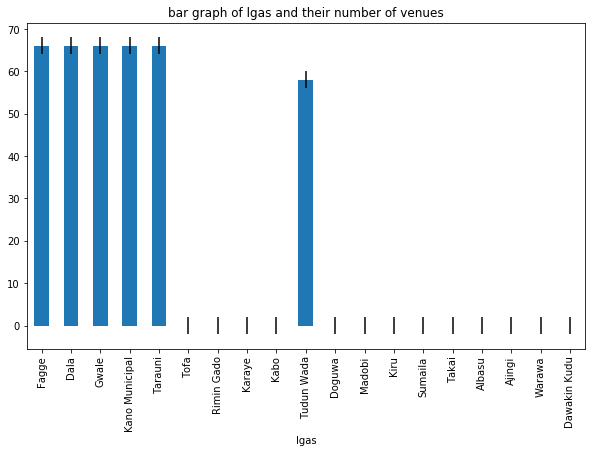

In [105]:
import seaborn as sns
%matplotlib inline

bar=summary_df.sum(axis=0)
bar=pd.DataFrame(bar, columns=['lo'])
bar

plt.figure(figsize=(10,6))
plt.title('bar graph of lgas and their number of venues')
plt.xlabel('lgas')
bar['lo'].plot(kind='bar',yerr=2)

In [106]:
summary_df.index

Index(['restaurant', 'shop', 'airports_and_relations', 'stores', 'eatries',
       'gym_and_sports', 'funplaces', 'hotel', 'Total_Venues'],
      dtype='object')

In [107]:
top_criteria=['restaurant', 'shop', 'airports_and_relations', 'stores', 'eatries','gym_and_sports', 'funplaces', 'hotel']

In [108]:
top_criteria_df = summary_df.loc[top_criteria]

top_criteria_df.loc['Total Venues'] = top_criteria_df.sum()

In [109]:
top_criteria_df.head()

,Fagge,Dala,Gwale,Kano Municipal,Tarauni,Tofa,Rimin Gado,Karaye,Kabo,Tudun Wada,Doguwa,Madobi,Kiru,Sumaila,Takai,Albasu,Ajingi,Warawa,Dawakin Kudu
restaurant,5,5,5,5,5,0,0,0,0,5,0,0,0,0,0,0,0,0,0
shop,6,6,6,6,6,0,0,0,0,6,0,0,0,0,0,0,0,0,0
airports_and_relations,5,5,5,5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
stores,4,4,4,4,4,0,0,0,0,4,0,0,0,0,0,0,0,0,0
eatries,6,6,6,6,6,0,0,0,0,6,0,0,0,0,0,0,0,0,0


In [110]:
# First let's save the columns to a variable
column_list = list(top_criteria_df.columns)

# Let's iterate through each LGA in the top_criteria_df and count the number of missing categories
# Then append each LGA and its missing categories score to the first dictionary

lga_dict = {}  # first dict
min_dict = {}  # second dict

for i in column_list:
    zero_count = 0
    for j in top_criteria_df[i]:
        if j == 0:
            zero_count  += 1
            lga_dict[i] = zero_count
print(lga_dict)

# Let's iterate through the first dictionary and append the keys and values 
# corresponding to the LGAs with the least missing categories to the second dictionary.

for i, j in lga_dict.items():
    if j == min(lga_dict.values()):
        min_dict[i] = j

# show the LGAs with the corresponding lowest missing categories 
print(min_dict)

{'Tofa': 9, 'Rimin Gado': 9, 'Karaye': 9, 'Kabo': 9, 'Doguwa': 9, 'Madobi': 9, 'Kiru': 9, 'Sumaila': 9, 'Takai': 9, 'Albasu': 9, 'Ajingi': 9, 'Warawa': 9, 'Dawakin Kudu': 9}
{'Tofa': 9, 'Rimin Gado': 9, 'Karaye': 9, 'Kabo': 9, 'Doguwa': 9, 'Madobi': 9, 'Kiru': 9, 'Sumaila': 9, 'Takai': 9, 'Albasu': 9, 'Ajingi': 9, 'Warawa': 9, 'Dawakin Kudu': 9}


In [111]:
top_criteria_df.Kiru.sum()

0

In [112]:
summary_df.sum(axis=0)

Fagge             66
Dala              66
Gwale             66
Kano Municipal    66
Tarauni           66
Tofa               0
Rimin Gado         0
Karaye             0
Kabo               0
Tudun Wada        58
Doguwa             0
Madobi             0
Kiru               0
Sumaila            0
Takai              0
Albasu             0
Ajingi             0
Warawa             0
Dawakin Kudu       0
dtype: int64

# lets analyze kano municipal because its the best place to site an office because it has a lot of venues 
## other better places are the ones with smaller numbers

In [115]:

plot_map('Kano Municipal')

# feel free to zoom in the map

In [116]:
KM_df = return_venues('Kano Municipal')

KM_df.head()

C:\Users\ebuka\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,venue.name,venue.categories,venue.location.lat,venue.location.lng,venue.location.distance,venue.id
0,Yahuza Suya Spot,BBQ Joint,11.988505,8.541734,1293,4d5430895b3f6dcbce96dccc
1,Ado Bayero Mall,Shopping Mall,11.977998,8.535017,1624,54d48f3b498e017e3b26f03d
2,Pizza shack,Pizza Place,12.007809,8.552716,3011,4d1aeef011fca0931a409ace
3,grand square Mall,Shopping Mall,12.020898,8.535897,3287,4fc8d5d3e4b081b29eb3ff04
4,Shoprite,Department Store,11.977209,8.534789,1701,52d7df93498ed1fa33eb487b


In [117]:
KM_df.shape

(33, 6)

In [118]:
#creating a map of kano municipal
address = 'Kano Municipal, kano'

geolocator = Nominatim(user_agent="NG_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kano Municipal are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Kano Municipal are 11.9918671, 8.5303654.


In [121]:
map_KM_venues = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, venue_category, venue_name in zip(KM_df['venue.location.lat'], KM_df['venue.location.lng'], KM_df['venue.categories'], KM_df['venue.name']):
    label = '{}, {}'.format(venue_name, venue_category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_KM_venues)  
    
map_KM_venues

In [123]:
#frequent categories in kano municipal
KM_df['venue.categories'].value_counts().head(10)

Shopping Mall                4
Airport                      2
Middle Eastern Restaurant    2
BBQ Joint                    2
Indian Restaurant            2
Convenience Store            2
Department Store             2
Airport Terminal             2
Hotel                        2
Resort                       1
Name: venue.categories, dtype: int64

In [195]:
df

,LGA,POP,latitude,longitude
0,Fagge,200095,12.0322,8.517420
1,Dala,418759,12.0091,8.505169
2,Gwale,357827,11.9852,8.506325
3,Kano Municipal,371243,11.9919,8.530365
4,Tarauni,221844,11.9783,8.552328
5,Nassarawa,596411,12.102,8.331010
6,Kumbotso,294391,11.888,8.502173
7,Ungogo,365737,12.0916,8.495340
8,Dawakin Tofa,246197,12.1421,8.361116
9,Tofa,98603,12.0574,8.273131


In [127]:
address = 'Kano, Nigeria'

geolocator = Nominatim(user_agent="NG_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kano State are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Kano State are 11.8948389, 8.5364136.


In [129]:
map_kano_state = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, LGA  in zip(df['latitude'], df['longitude'], df['LGA']):
    label = '{}'.format(LGA)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_kano_state)  
    
map_kano_state

In [130]:
CLIENT_ID = 'SHZGKF5EWPSH2Q1I0T0J5PCHBQCGPK0CVZRQK1ZAFH2ZBRAF' # your Foursquare ID
CLIENT_SECRET = 'KXPHK4RZ3AENYNT3GOEO11G5Y4EXM1RWNBI202VL0YC443ZT' # your Foursquare Secret
VERSION = '20200504'
radius = 10000 # 10,000 meters is 10KM
LIMIT=200 

In [140]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=10000
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['LGA', 
                  'LGA_Latitude', 
                  'LGA_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [141]:
kano_state_venues = getNearbyVenues(names= df['LGA'],
                                     latitudes= df['latitude'],
                                     longitudes= df['longitude'])

Fagge
Dala
Gwale
Kano Municipal
Tarauni
Nassarawa
Kumbotso
Ungogo
Dawakin Tofa
Tofa
Rimin Gado
Bagwai
Gezawa
Gabasawa
Minjibir
Dambatta
Makoda
Kunchi
Bichi
Tsanyawa
Shanono
Gwarzo
Karaye
Rogo
Kabo
Bunkure
Kibiya
Rano
Tudun Wada
Doguwa
Madobi
Kura
Garun Mallam
Bebeji
Kiru
Sumaila
Garko
Takai
Albasu
Gaya
Ajingi
Wudil
Warawa
Dawakin Kudu
Southern Kano State


In [203]:
print(kano_state_venues.shape)

kano_state_venues

(227, 7)


,LGA,LGA_Latitude,LGA_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Fagge,12.032223,8.517420,grand square Mall,12.020898,8.535897,Shopping Mall
1,Fagge,12.032223,8.517420,Pizza shack,12.007809,8.552716,Pizza Place
2,Fagge,12.032223,8.517420,Wellcare,12.006727,8.558666,Department Store
3,Fagge,12.032223,8.517420,Mallam Aminu Kano Airport VIP longue,12.046536,8.521965,Airport Lounge
4,Fagge,12.032223,8.517420,Kano fried chicken( Kfc),12.006638,8.559862,Fried Chicken Joint
...,...,...,...,...,...,...,...
222,Southern Kano State,6.946680,124.883391,Greenwich,6.924401,124.886780,Pizza Place
223,Southern Kano State,6.946680,124.883391,Mlang Municipal Paza,6.944851,124.885039,Park
224,Southern Kano State,6.946680,124.883391,Mlang Specialist Medical Center,6.942555,124.884662,Health & Beauty Service
225,Southern Kano State,6.946680,124.883391,SBC Highschool Soccer Field,6.949419,124.888401,Soccer Field


In [143]:
kano_state_venues.groupby('LGA').count()

,LGA_Latitude,LGA_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
LGA,,,,,,
Bagwai,1,1,1,1,1,1
Bichi,1,1,1,1,1,1
Dala,33,33,33,33,33,33
Dambatta,1,1,1,1,1,1
Dawakin Tofa,2,2,2,2,2,2
Fagge,33,33,33,33,33,33
Garun Mallam,1,1,1,1,1,1
Gezawa,1,1,1,1,1,1
Gwale,33,33,33,33,33,33


In [144]:
print('There are {} unique categories of venues returned for Kano State.'.
      format(kano_state_venues['Venue_Category'].nunique()))

There are 37 unique categories of venues returned for Kano State.


In [145]:
# one hot encoding
kano_onehot = pd.get_dummies(kano_state_venues[['Venue_Category']], prefix="", prefix_sep="")

# add LGA column back to dataframe
kano_onehot['LGA'] = kano_state_venues['LGA'] 

# move LGA column to the first column
fixed_columns = [kano_onehot.columns[-1]] + list(kano_onehot.columns[:-1])
kano_onehot = kano_onehot[fixed_columns]

kano_onehot.head()

,LGA,African Restaurant,Airport,Airport Lounge,Airport Terminal,Amphitheater,Art Gallery,BBQ Joint,Bakery,Bank,...,Pedestrian Plaza,Pharmacy,Pizza Place,Pool,Resort,Restaurant,Shop & Service,Shopping Mall,Soccer Field,Tea Room
0,Fagge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Fagge,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Fagge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fagge,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fagge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
kano_grouped = kano_onehot.groupby('LGA').mean().reset_index()

kano_grouped

,LGA,African Restaurant,Airport,Airport Lounge,Airport Terminal,Amphitheater,Art Gallery,BBQ Joint,Bakery,Bank,...,Pedestrian Plaza,Pharmacy,Pizza Place,Pool,Resort,Restaurant,Shop & Service,Shopping Mall,Soccer Field,Tea Room
0,Bagwai,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
1,Bichi,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
2,Dala,0.0,0.060606,0.030303,0.060606,0.0,0.030303,0.060606,0.030303,0.0,...,0.0,0.0,0.030303,0.0,0.030303,0.030303,0.030303,0.121212,0.030303,0.000
3,Dambatta,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
4,Dawakin Tofa,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
5,Fagge,0.0,0.060606,0.030303,0.060606,0.0,0.030303,0.060606,0.030303,0.0,...,0.0,0.0,0.030303,0.0,0.030303,0.030303,0.030303,0.121212,0.030303,0.000
6,Garun Mallam,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
7,Gezawa,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
8,Gwale,0.0,0.060606,0.030303,0.060606,0.0,0.030303,0.060606,0.030303,0.0,...,0.0,0.0,0.030303,0.0,0.030303,0.030303,0.030303,0.121212,0.030303,0.000
9,Gwarzo,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000


In [148]:
kano_grouped.shape

(22, 38)

In [149]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [167]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['LGA']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
lga_venues_sorted = pd.DataFrame(columns=columns)
lga_venues_sorted['LGA'] = kano_grouped['LGA']

for ind in np.arange(kano_grouped.shape[0]):
    lga_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kano_grouped.iloc[ind, :], num_top_venues)

lga_venues_sorted

,LGA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bagwai,Pedestrian Plaza,Bank,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Café,Tea Room
1,Bichi,Bank,Health & Beauty Service,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Café,Tea Room
2,Dala,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
3,Dambatta,Amphitheater,Tea Room,Café,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Bank
4,Dawakin Tofa,Garden,Moving Target,Café,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Tea Room
5,Fagge,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
6,Garun Mallam,Farm,Tea Room,Health & Beauty Service,Fried Chicken Joint,Fast Food Restaurant,Department Store,Cosmetics Shop,Convenience Store,Café,Bank
7,Gezawa,Lake,Tea Room,Café,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Bank
8,Gwale,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
9,Gwarzo,Fast Food Restaurant,Tea Room,Health & Beauty Service,Fried Chicken Joint,Farm,Department Store,Cosmetics Shop,Convenience Store,Café,Bank


In [171]:
# set number of clusters
kclusters = 5

kano_grouped_clustering = kano_grouped.drop('LGA', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kano_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 0, 1, 2, 1, 1, 1, 4, 1, 1, 1, 3, 1, 2, 4, 1, 3, 1, 1, 1, 1, 1])

In [169]:
# insert clustering labels
lga_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# Let's select LGA, latitude and longitude data columns from lagos_df
kano_merged = df[['LGA', 'latitude', 'longitude']]

# merge lagos_merged with lga_venues_sorted to add latitude/longitude for each neighborhood
kano_merged = pd.merge(kano_merged,lga_venues_sorted.set_index('LGA'), on='LGA')

In [170]:
kano_merged

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Fagge,12.0322,8.517420,1,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
1,Dala,12.0091,8.505169,1,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
2,Gwale,11.9852,8.506325,1,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
3,Kano Municipal,11.9919,8.530365,1,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
4,Tarauni,11.9783,8.552328,1,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
5,Nassarawa,12.102,8.331010,1,Garden,Moving Target,Café,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Tea Room
6,Kumbotso,11.888,8.502173,1,African Restaurant,Shop & Service,Restaurant,Pool,Department Store,Bank,Fast Food Restaurant,Farm,Cosmetics Shop,Convenience Store
7,Ungogo,12.0916,8.495340,1,Airport Terminal,Airport,Tea Room,Airport Lounge,Soccer Field,Shopping Mall,Amphitheater,Art Gallery,BBQ Joint,Garden
8,Dawakin Tofa,12.1421,8.361116,1,Garden,Moving Target,Café,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Tea Room
9,Bagwai,12.1577,8.135700,1,Pedestrian Plaza,Bank,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Café,Tea Room


In [173]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kano_merged['latitude'], kano_merged['longitude'], kano_merged['LGA'], kano_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color= rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [174]:
cluster1 = kano_merged[kano_merged['Cluster Labels'] == 0]
cluster2 = kano_merged[kano_merged['Cluster Labels'] == 1]
cluster3 = kano_merged[kano_merged['Cluster Labels'] == 2]
cluster4 = kano_merged[kano_merged['Cluster Labels'] == 3]
cluster5 = kano_merged[kano_merged['Cluster Labels'] == 4]

for i in range(5):
    x = kano_merged[kano_merged['Cluster Labels'] == i]
    print('cluster'+str(i+1) + ' shape is {}'.format(x.shape))

cluster1 shape is (1, 14)
cluster2 shape is (15, 14)
cluster3 shape is (2, 14)
cluster4 shape is (2, 14)
cluster5 shape is (2, 14)


In [176]:
cluster_one = kano_merged[kano_merged['Cluster Labels'] == 0]
cluster1_lgas = list(cluster1['LGA'])
cluster1_lgas

['Bichi']

In [197]:
cluster_one

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Bichi,12.2331,8.240723,0,Bank,Health & Beauty Service,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Café,Tea Room


In [177]:
cluster_two = kano_merged[kano_merged['Cluster Labels'] == 1]
cluster2_lgas = list(cluster2['LGA'])
cluster2_lgas

['Fagge',
 'Dala',
 'Gwale',
 'Kano Municipal',
 'Tarauni',
 'Nassarawa',
 'Kumbotso',
 'Ungogo',
 'Dawakin Tofa',
 'Bagwai',
 'Gwarzo',
 'Tudun Wada',
 'Garun Mallam',
 'Wudil',
 'Southern Kano State']

In [199]:
cluster_two

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Fagge,12.0322,8.517420,1,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
1,Dala,12.0091,8.505169,1,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
2,Gwale,11.9852,8.506325,1,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
3,Kano Municipal,11.9919,8.530365,1,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
4,Tarauni,11.9783,8.552328,1,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
5,Nassarawa,12.102,8.331010,1,Garden,Moving Target,Café,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Tea Room
6,Kumbotso,11.888,8.502173,1,African Restaurant,Shop & Service,Restaurant,Pool,Department Store,Bank,Fast Food Restaurant,Farm,Cosmetics Shop,Convenience Store
7,Ungogo,12.0916,8.495340,1,Airport Terminal,Airport,Tea Room,Airport Lounge,Soccer Field,Shopping Mall,Amphitheater,Art Gallery,BBQ Joint,Garden
8,Dawakin Tofa,12.1421,8.361116,1,Garden,Moving Target,Café,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Tea Room
9,Bagwai,12.1577,8.135700,1,Pedestrian Plaza,Bank,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Café,Tea Room


In [178]:
cluster_three = kano_merged[kano_merged['Cluster Labels'] == 2]
cluster3_lgas = list(cluster3['LGA'])
cluster3_lgas

['Dambatta', 'Makoda']

In [200]:
cluster_three

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Dambatta,12.4339,8.515069,2,Amphitheater,Tea Room,Café,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Bank
13,Makoda,12.4187,8.432528,2,Amphitheater,Tea Room,Café,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Bank


In [179]:
cluster_four = kano_merged[kano_merged['Cluster Labels'] == 3]
cluster4_lgas = list(cluster4['LGA'])
cluster4_lgas

['Kibiya', 'Rano']

In [201]:
cluster_four

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Kibiya,11.5295,8.659410,3,Art Gallery,Tea Room,Café,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Bank
17,Rano,11.5564,8.581256,3,Art Gallery,Tea Room,Café,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Bank


In [180]:
cluster_five = kano_merged[kano_merged['Cluster Labels'] == 4]
cluster5_lgas = list(cluster5['LGA'])
cluster5_lgas

['Gezawa', 'Minjibir']

In [202]:
cluster_five

,LGA,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Gezawa,12.0972,8.753899,4,Lake,Tea Room,Café,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Bank
11,Minjibir,12.1782,8.659182,4,Lake,Tea Room,Café,Fried Chicken Joint,Fast Food Restaurant,Farm,Department Store,Cosmetics Shop,Convenience Store,Bank


In [182]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [185]:
selection = kano_merged.iloc[:, 4:]

# Let's view the first 5 rows of our selection
selection.head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
1,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
2,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
3,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge
4,Shopping Mall,Hotel,Airport Terminal,Convenience Store,Indian Restaurant,BBQ Joint,Middle Eastern Restaurant,Department Store,Airport,Airport Lounge


In [187]:
kano_merged.shape

(22, 14)

In [188]:
col_list = list(selection.columns)
words = ''
for i in col_list:
    for j in list(selection[i]):
        words += j
        words += ', '

print(len(words))
words

3190


'Shopping Mall, Shopping Mall, Shopping Mall, Shopping Mall, Shopping Mall, Garden, African Restaurant, Airport Terminal, Garden, Pedestrian Plaza, Lake, Lake, Amphitheater, Amphitheater, Bank, Fast Food Restaurant, Art Gallery, Art Gallery, Shopping Mall, Farm, Mobile Phone Shop, Park, Hotel, Hotel, Hotel, Hotel, Hotel, Moving Target, Shop & Service, Airport, Moving Target, Bank, Tea Room, Tea Room, Tea Room, Tea Room, Health & Beauty Service, Tea Room, Tea Room, Tea Room, Hotel, Tea Room, Tea Room, Health & Beauty Service, Airport Terminal, Airport Terminal, Airport Terminal, Airport Terminal, Airport Terminal, Café, Restaurant, Tea Room, Café, Fried Chicken Joint, Café, Café, Café, Café, Fried Chicken Joint, Health & Beauty Service, Café, Café, Department Store, Health & Beauty Service, Café, Soccer Field, Convenience Store, Convenience Store, Convenience Store, Convenience Store, Convenience Store, Fried Chicken Joint, Pool, Airport Lounge, Fried Chicken Joint, Fast Food Restaurant

In [189]:
top_venues_wc = WordCloud(
          background_color='white',
          max_words= len(words),
          stopwords=stopwords)
top_venues_wc.generate(words)

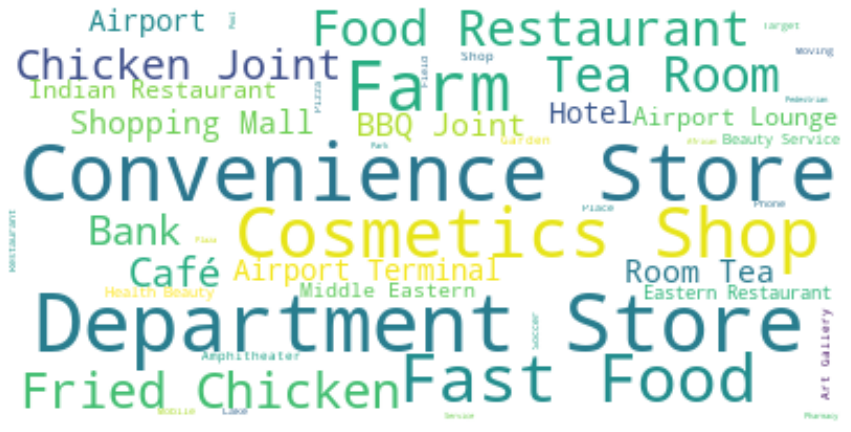

In [191]:
top_venues_wc.generate(words)
plt.figure(figsize=(15, 14))
plt.imshow(top_venues_wc, interpolation='bilinear')
plt.axis('off')
plt.show()